# RFC

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.impute import SimpleImputer
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [97]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [98]:
# 对目标变量进行编码
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['attack_type'])

# 分离特征和目标变量
X = df.drop('attack_type', axis=1)
imputer = SimpleImputer(strategy='mean')  # 使用平均值填充NaN
X_imputed = imputer.fit_transform(X)

# 初始化随机森林模型，开启OOB评分
rf_classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=42,max_depth=4)

# 拟合模型到全部数据
rf_classifier.fit(X_imputed, y)

# 使用OOB样本进行性能评估
oob_score = rf_classifier.oob_score_
print(f"OOB Score: {oob_score}")

# 获取OOB预测
y_oob_pred = rf_classifier.oob_decision_function_
# 将OOB预测的概率转换为最终类别
y_oob_pred_class = y_oob_pred.argmax(axis=1)

# 输出袋外样本的分类报告
print(classification_report(y, y_oob_pred_class, digits=4))



OOB Score: 0.9879522550710949
              precision    recall  f1-score   support

           0     0.9885    0.9998    0.9941    391288
           1     0.9843    0.9671    0.9756     61981
           2     1.0000    0.2021    0.3362      3429
           3     1.0000    0.0031    0.0061       649

    accuracy                         0.9880    457347
   macro avg     0.9932    0.5430    0.5780    457347
weighted avg     0.9880    0.9880    0.9853    457347



# SMOTE OVERLAPPED

In [146]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457347 entries, 0 to 457347
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     457347 non-null  int64  
 1   src_bytes                    457347 non-null  int64  
 2   dst_bytes                    457347 non-null  int64  
 3   wrong_fragment               457347 non-null  int64  
 4   hot                          457347 non-null  int64  
 5   logged_in                    457347 non-null  int64  
 6   num_compromised              457347 non-null  int64  
 7   rerror_rate                  457347 non-null  float64
 8   diff_srv_rate                457347 non-null  float64
 9   srv_diff_host_rate           457347 non-null  float64
 10  dst_host_srv_diff_host_rate  457347 non-null  float64
 11  attack_type                  457347 non-null  object 
 12  flag                         456827 non-null  float64
 13 

In [148]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print("The Total Number of Duplicates:", num_duplicates)

# 删除重复数据
df= df.drop_duplicates()


The Total Number of Duplicates: 420625


In [149]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print("The Total Number of Duplicates:", num_duplicates)

df= df.drop_duplicates()

The Total Number of Duplicates: 0


In [150]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['attack_type'])
X=df.drop(['attack_type'],axis=1)
names=X.columns
imputer = SimpleImputer(strategy='mean') # 或使用其他策略，如 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)
# 使用SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
# 重新创建DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=names), pd.DataFrame(y_resampled, columns=['attack_type'])], axis=1)

In [151]:
df_resampled['attack_type'].value_counts()

1    36125
0    36125
2    36125
3    36125
Name: attack_type, dtype: int64

In [152]:
duplicates = df_resampled.duplicated()

num_duplicates = duplicates.sum()
print("The Total Number of Duplicates:", num_duplicates)

The Total Number of Duplicates: 0


In [153]:
y=df_resampled['attack_type']
X_imputed=df_resampled.drop(['attack_type'],axis=1)

In [155]:
# 初始化随机森林模型，开启OOB评分
rf_classifier = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=42,max_depth=5)

# 拟合模型到全部数据
rf_classifier.fit(X_imputed, y)

# 使用OOB样本进行性能评估
oob_score = rf_classifier.oob_score_
print(f"OOB Score: {oob_score}")

# 获取OOB预测
y_oob_pred = rf_classifier.oob_decision_function_
# 将OOB预测的概率转换为最终类别
y_oob_pred_class = y_oob_pred.argmax(axis=1)

# 输出袋外样本的分类报告
print(classification_report(y, y_oob_pred_class, digits=4))

OOB Score: 0.9776608996539793
              precision    recall  f1-score   support

           0     0.9766    0.9860    0.9813     36125
           1     0.9946    0.9557    0.9748     36125
           2     0.9693    0.9801    0.9747     36125
           3     0.9710    0.9888    0.9798     36125

    accuracy                         0.9777    144500
   macro avg     0.9779    0.9777    0.9776    144500
weighted avg     0.9779    0.9777    0.9776    144500



# Grid Search

In [156]:


# 设置参数网格
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth':[5,10,15]
}

# 初始化随机森林模型
rf = RandomForestClassifier(random_state=42, oob_score=True)

# 网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_imputed, y)

# 最优参数组合
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最优参数组合重新训练模型
best_rf = grid_search.best_estimator_

# 输出袋外样本的分类报告
print("OOB Score:", best_rf.oob_score_)
print(classification_report(y, best_rf.oob_decision_function_.argmax(axis=1), digits=4))

# 输出特征重要性
feature_names = X.columns
feature_importances = best_rf.feature_importances_
print("Feature Importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150}
OOB Score: 0.9987612456747404
              precision    recall  f1-score   support

           0     0.9971    0.9998    0.9984     36125
           1     0.9995    0.9983    0.9989     36125
           2     0.9992    0.9972    0.9982     36125
           3     0.9993    0.9998    0.9995     36125

    accuracy                         0.9988    144500
   macro avg     0.9988    0.9988    0.9988    144500
weighted avg     0.9988    0.9988    0.9988    144500

Feature Importances:
duration: 0.021810357340975292
src_bytes: 0.23035146143111304
dst_bytes: 0.17767621220593172
wrong_fragment: 0.030338140434781617
hot: 0.034886642295152696
logged_in: 0.11948481477637235
num_compromised: 0.020602325176937986
rerror_rate: 0.06886038007560912
diff_srv_rate: 0.09809895861789504
srv_diff_host_rate: 0.02613054275064809
dst_host_srv_di

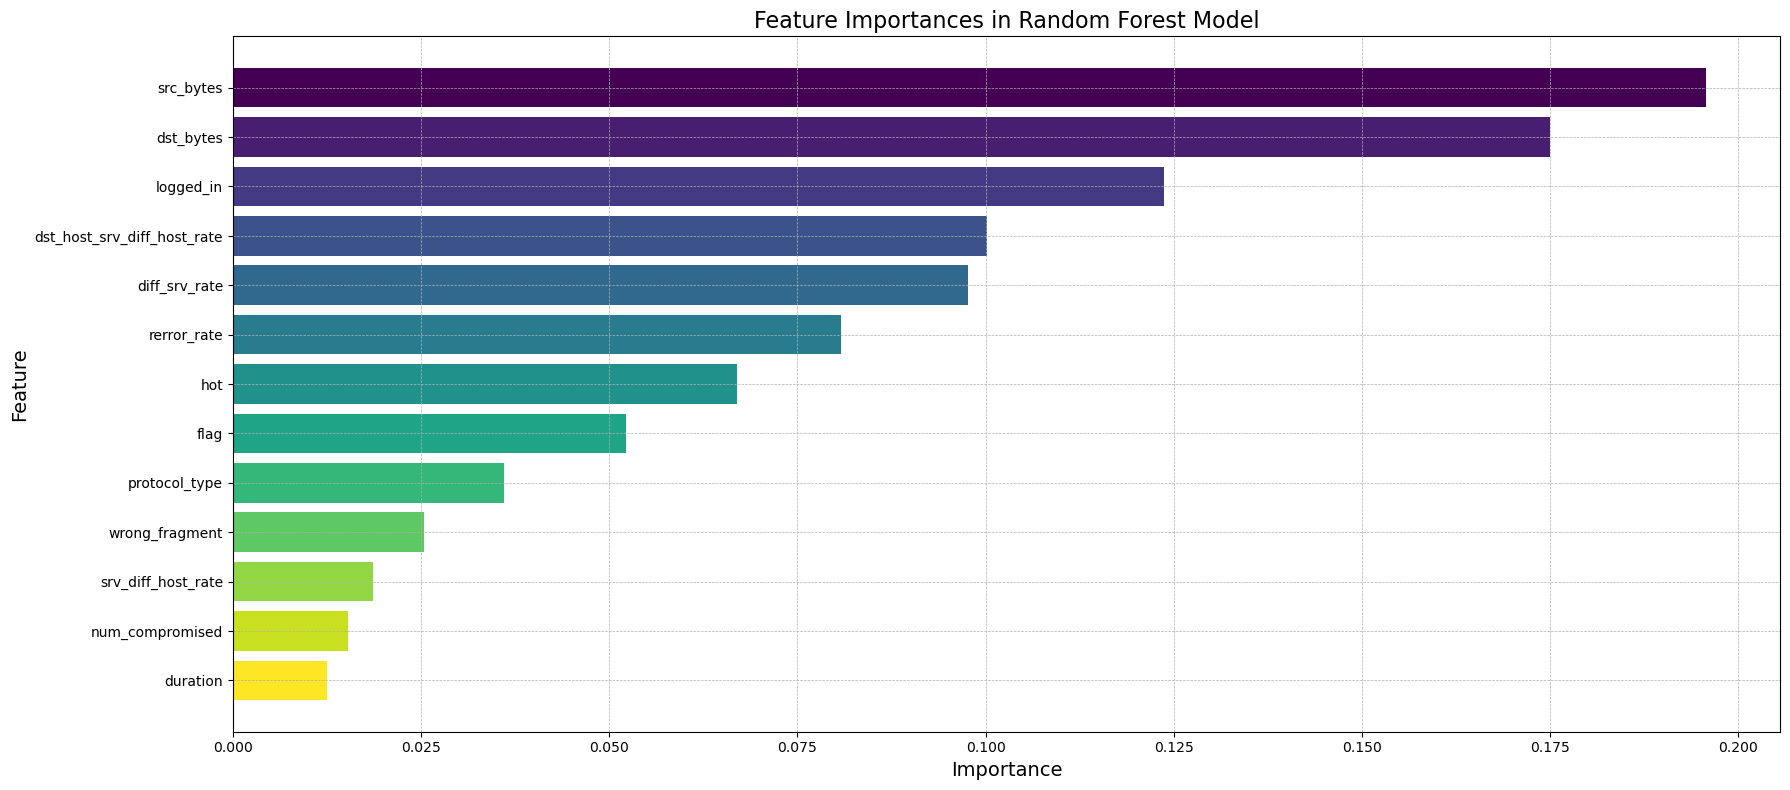

In [157]:
# 获取特征名称和对应的重要性
feature_names = X.columns
feature_importances = rf_classifier.feature_importances_

# 将特征名称和重要性合并为元组，然后按重要性排序
features_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# 生成颜色
n_features = len(features_sorted)
colors = cm.viridis(np.linspace(0, 1, n_features))

# 可视化特征重要性
plt.figure(figsize=(18, 8))
plt.title("Feature Importances in Random Forest Model", fontsize=16)
plt.barh([f[0] for f in features_sorted], [f[1] for f in features_sorted], color=colors)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.gca().invert_yaxis()  # 将最重要的特征放在顶部
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # 使X轴标签更整洁
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格
plt.tight_layout()  # 调整整体布局
plt.show()

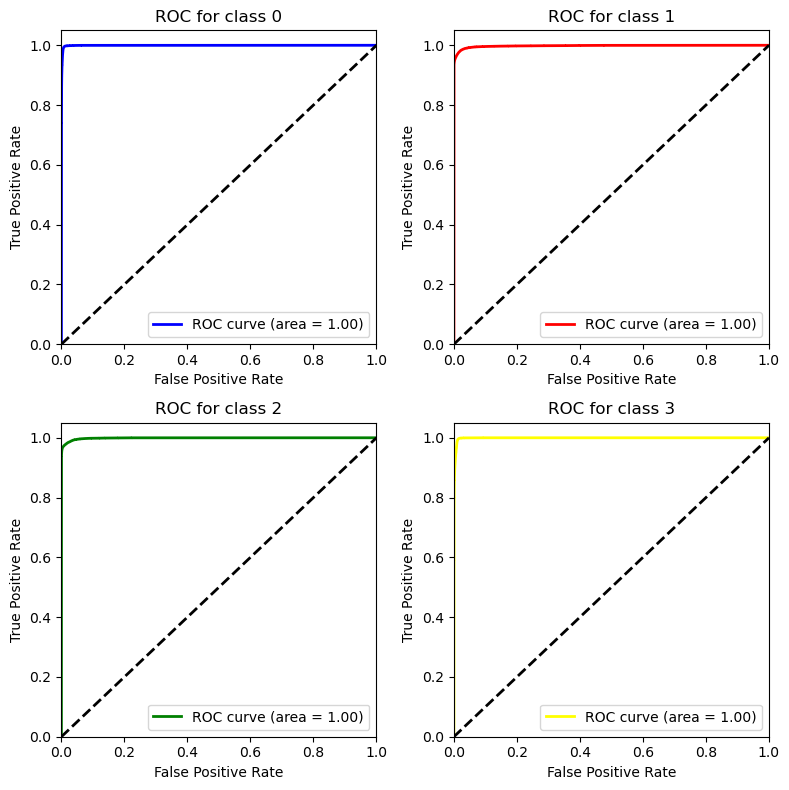

In [158]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binarize the output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_oob_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 设置子图
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.ravel()

colors = cycle(['blue', 'red', 'green', 'yellow'])
for i, color in zip(range(n_classes), colors):
    ax[i].plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc[i]))
    ax[i].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[i].set_xlim([0.0, 1.0])
    ax[i].set_ylim([0.0, 1.05])
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].set_title('ROC for class {0}'.format(i))
    ax[i].legend(loc="lower right")

plt.tight_layout()
plt.show()
